# import all the required libraries

In [2]:
import tensorflow as tf
import numpy as np  
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation


# Read the prepocessed data

In [3]:
data=pd.read_csv('fpreprocess.csv')
data.head()

,AGE,ALCOHOL_TEST_RESULT,DRUG_TEST_RESULT,INJURY_SEVERITY,SEX_Male,SEX_Female,SEX_Unknown,PERSON_TYPE_Driver,PERSON_TYPE_Passenger_of_a_Motor_Vehicle_in_Transport,PERSON_TYPE_Pedestrian,...,RELATED_FACTOR_PERSON_LEVEL_Not_Applicable_Driver,RELATED_FACTOR_PERSON_LEVEL_Improper_Crossing_or_Roadway,RELATED_FACTOR_PERSON_LEVEL_Walking_or_Riding_with_or_Against_Traffic_or_Playing_in_Roadway,RELATED_FACTOR_PERSON_LEVEL_Running_into_Road,RELATED_FACTOR_PERSON_LEVEL_Not_Visible,RELATED_FACTOR_PERSON_LEVEL_Failure_to_Yield_Right_of_Way,RELATED_FACTOR_PERSON_LEVEL_Unknown,RELATED_FACTOR_PERSON_LEVEL_Inattentive,RELATED_FACTOR_PERSON_LEVEL_Failure_to_Obey_Traffic_Sign_or_Traffic_Officers_Failure_to_Observe,RELATED_FACTOR_PERSON_LEVEL_Interfering_with_Driver
0,34,97,999,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,20,96,0,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,43,96,0,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,38,96,0,2,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,50,97,999,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
for col in data.columns:
    print(col)

AGE
ALCOHOL_TEST_RESULT
DRUG_TEST_RESULT
INJURY_SEVERITY
SEX_Male
SEX_Female
SEX_Unknown
PERSON_TYPE_Driver
PERSON_TYPE_Passenger_of_a_Motor_Vehicle_in_Transport
PERSON_TYPE_Pedestrian
PERSON_TYPE_Bicyclist
PERSON_TYPE_Unknown_Occupant_Type_in_a_Motor_Vehicle_in_Transport
PERSON_TYPE_Occupant_of_a_Motor_Vehicle_Not_in_Transport
PERSON_TYPE_Other_Pedestrian
PERSON_TYPE_Occupant_of_a_Non_Motor_Vehicle_Transport_Device
PERSON_TYPE_Other_Cyclist
PERSON_TYPE_Unknown_Type_of_Non_Motorist
SEATING_POSITION_Front_Seat_Drivers_Side
SEATING_POSITION_Front_Seat_Right_Side
SEATING_POSITION_Non_Motorist
SEATING_POSITION_Second_Seat_Right_Side
SEATING_POSITION_Second_Seat_Left_Side
SEATING_POSITION_Second_Seat_Middle
SEATING_POSITION_Unknown
SEATING_POSITION_Other_Passenger_in_enclosed_cargo_area
SEATING_POSITION_Front_Seat_Middle
SEATING_POSITION_Other_Passenger_in_unenclosed_cargo_area
RESTRAINT_SYSTEM_USE_None_Used
RESTRAINT_SYSTEM_USE_Lap_and_Shoulder_Belt
RESTRAINT_SYSTEM_USE_Unknown
RESTRAINT_S

In [5]:
X=data.drop(['INJURY_SEVERITY'],axis=1)
Y=data['INJURY_SEVERITY']

# split train and test data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [7]:
X_train.shape
X_test.shape

(10097, 98)

# scale the data

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [9]:
from tensorflow.keras.optimizers import SGD

In [10]:
opti = SGD(lr=0.01, momentum=0.9)


# Train the Sequential model 

In [11]:
modell = Sequential()
modell.add(Dense(600,activation='relu',input_dim=X_test.shape[1]))
modell.add(Dense(400,activation='relu'))
modell.add(Dense(200,activation='relu'))
modell.add(Dense(100,activation='relu'))
modell.add(Dense(50,activation='relu'))
modell.add(Dense(80,activation='relu'))
modell.add(Dense(8,activation='softmax'))
modell.compile(optimizer=opti,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=modell.fit(X_train,Y_train,batch_size=50,epochs=100,validation_split=0.1,verbose=1,)


Epoch 1/100
1636/1636 [==============================] - 86s 53ms/step - loss: 0.9146 - accuracy: 0.6256 - val_loss: 0.8544 - val_accuracy: 0.6487
Epoch 2/100
1636/1636 [==============================] - 85s 52ms/step - loss: 0.8466 - accuracy: 0.6475 - val_loss: 0.8531 - val_accuracy: 0.6495
Epoch 3/100
1636/1636 [==============================] - 85s 52ms/step - loss: 0.8355 - accuracy: 0.6517 - val_loss: 0.8642 - val_accuracy: 0.6353
Epoch 4/100
1636/1636 [==============================] - 84s 51ms/step - loss: 0.8265 - accuracy: 0.6538 - val_loss: 0.8465 - val_accuracy: 0.6506
Epoch 5/100
1636/1636 [==============================] - 81s 50ms/step - loss: 0.8206 - accuracy: 0.6571 - val_loss: 0.8391 - val_accuracy: 0.6533
Epoch 6/100
1636/1636 [==============================] - 80s 49ms/step - loss: 0.8142 - accuracy: 0.6585 - val_loss: 0.8420 - val_accuracy: 0.6491
Epoch 7/100
1636/1636 [==============================] - 79s 48ms/step - loss: 0.8101 - accuracy: 0.6598 - val_loss: 0

In [12]:
modell.evaluate(X_train,Y_train)

2840/2840 [==============================] - 48s 17ms/step - loss: 0.6711 - accuracy: 0.7258


[0.6710850596427917, 0.7257651090621948]

# save the model

In [13]:
modell.save('fmodel72.h5')

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# Accuracy and loss graphs

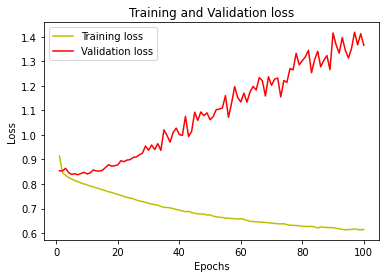

In [18]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

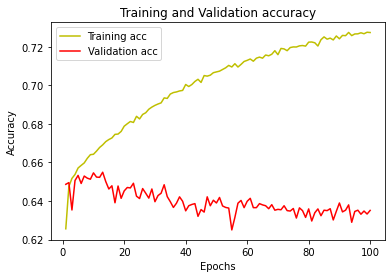

In [19]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
#epochs = range(1,len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

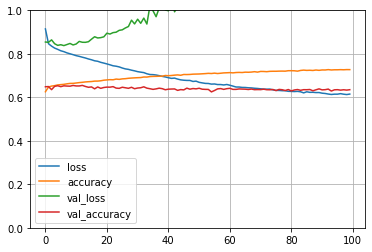

In [21]:
pd.DataFrame(history.history).plot(figsize=(6,4))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [23]:
from keras.models import load_model


In [24]:
mod = load_model('fmodel72.h5')
mod.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 600)               59400     
_________________________________________________________________
dense_1 (Dense)              (None, 400)               240400    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 80)                4080      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 6